In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


Step: Preparing the data

In [2]:
#load train data from csv file using pandas
data = pd.read_csv("train.csv")

In [3]:
#print the first 5 rows for the object  
data.head(n=5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#Count number of distinct elements.
data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [5]:
#print information about the data
#The information contains the number of columns,column labels,column data types
#memmory usage,range index and number of cells in each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
#identify column
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
#identify missing values
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
#percentage of missing values
missing_values_count = data.isnull().sum()
total_missing_values_count = missing_values_count.sum()
total_cell = np.product(data.shape)
percentage = (total_missing_values_count/total_cell) * 100
print("Percentage of missing values in train data",percentage)

Percentage of missing values in train data 8.099513655069211


In [9]:
#describe numerical data
data.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [10]:
#correlation is statistical functions that help analyze numerical data
corr=data.corr()

In [11]:
corr['Survived'].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

In [12]:
#fill missing data
#for Age,Embarked
data['Age'] = data['Age'].fillna(data['Age'].mean())

In [13]:
#let drop unnecessary columns
data = data.drop(['PassengerId','Name','Cabin','Ticket'], axis=1)

In [14]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


In [15]:
#number of survived
data.Survived.value_counts(normalize=True) * 100

0    61.616162
1    38.383838
Name: Survived, dtype: float64

In [16]:
#Number of people in Pclass
data.Pclass.value_counts(normalize=True) * 100

3    55.106622
1    24.242424
2    20.650954
Name: Pclass, dtype: float64

In [17]:
#Number of male and female
data.Sex.value_counts(normalize=True) * 100

male      64.758698
female    35.241302
Name: Sex, dtype: float64

In [18]:
#Number of Siblings/Spouses Aboard
data.SibSp.value_counts(normalize=True) * 100

0    68.237935
1    23.456790
2     3.142536
4     2.020202
3     1.795735
8     0.785634
5     0.561167
Name: SibSp, dtype: float64

In [19]:
#Number of Parents/Children Aboard
data.Parch.value_counts(normalize=True) * 100

0    76.094276
1    13.243547
2     8.978676
5     0.561167
3     0.561167
4     0.448934
6     0.112233
Name: Parch, dtype: float64

In [20]:
#Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
data.Embarked.value_counts(normalize=True) * 100

S    72.440945
C    18.897638
Q     8.661417
Name: Embarked, dtype: float64

In [21]:
max_count=data.Embarked.value_counts().max()

In [22]:
#Replacing null values with max count in Embarked column
data.Embarked = data.Embarked.fillna(max_count)

In [23]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [24]:
#Now we cleaned all the data. Its ready for model prediction

In [25]:
corr2=data.corr()

In [26]:
corr2.Survived.sort_values(ascending=False)

Survived    1.000000
Fare        0.257307
Parch       0.081629
SibSp      -0.035322
Age        -0.069809
Pclass     -0.338481
Name: Survived, dtype: float64

In [27]:
#Data Visualization

<AxesSubplot:>

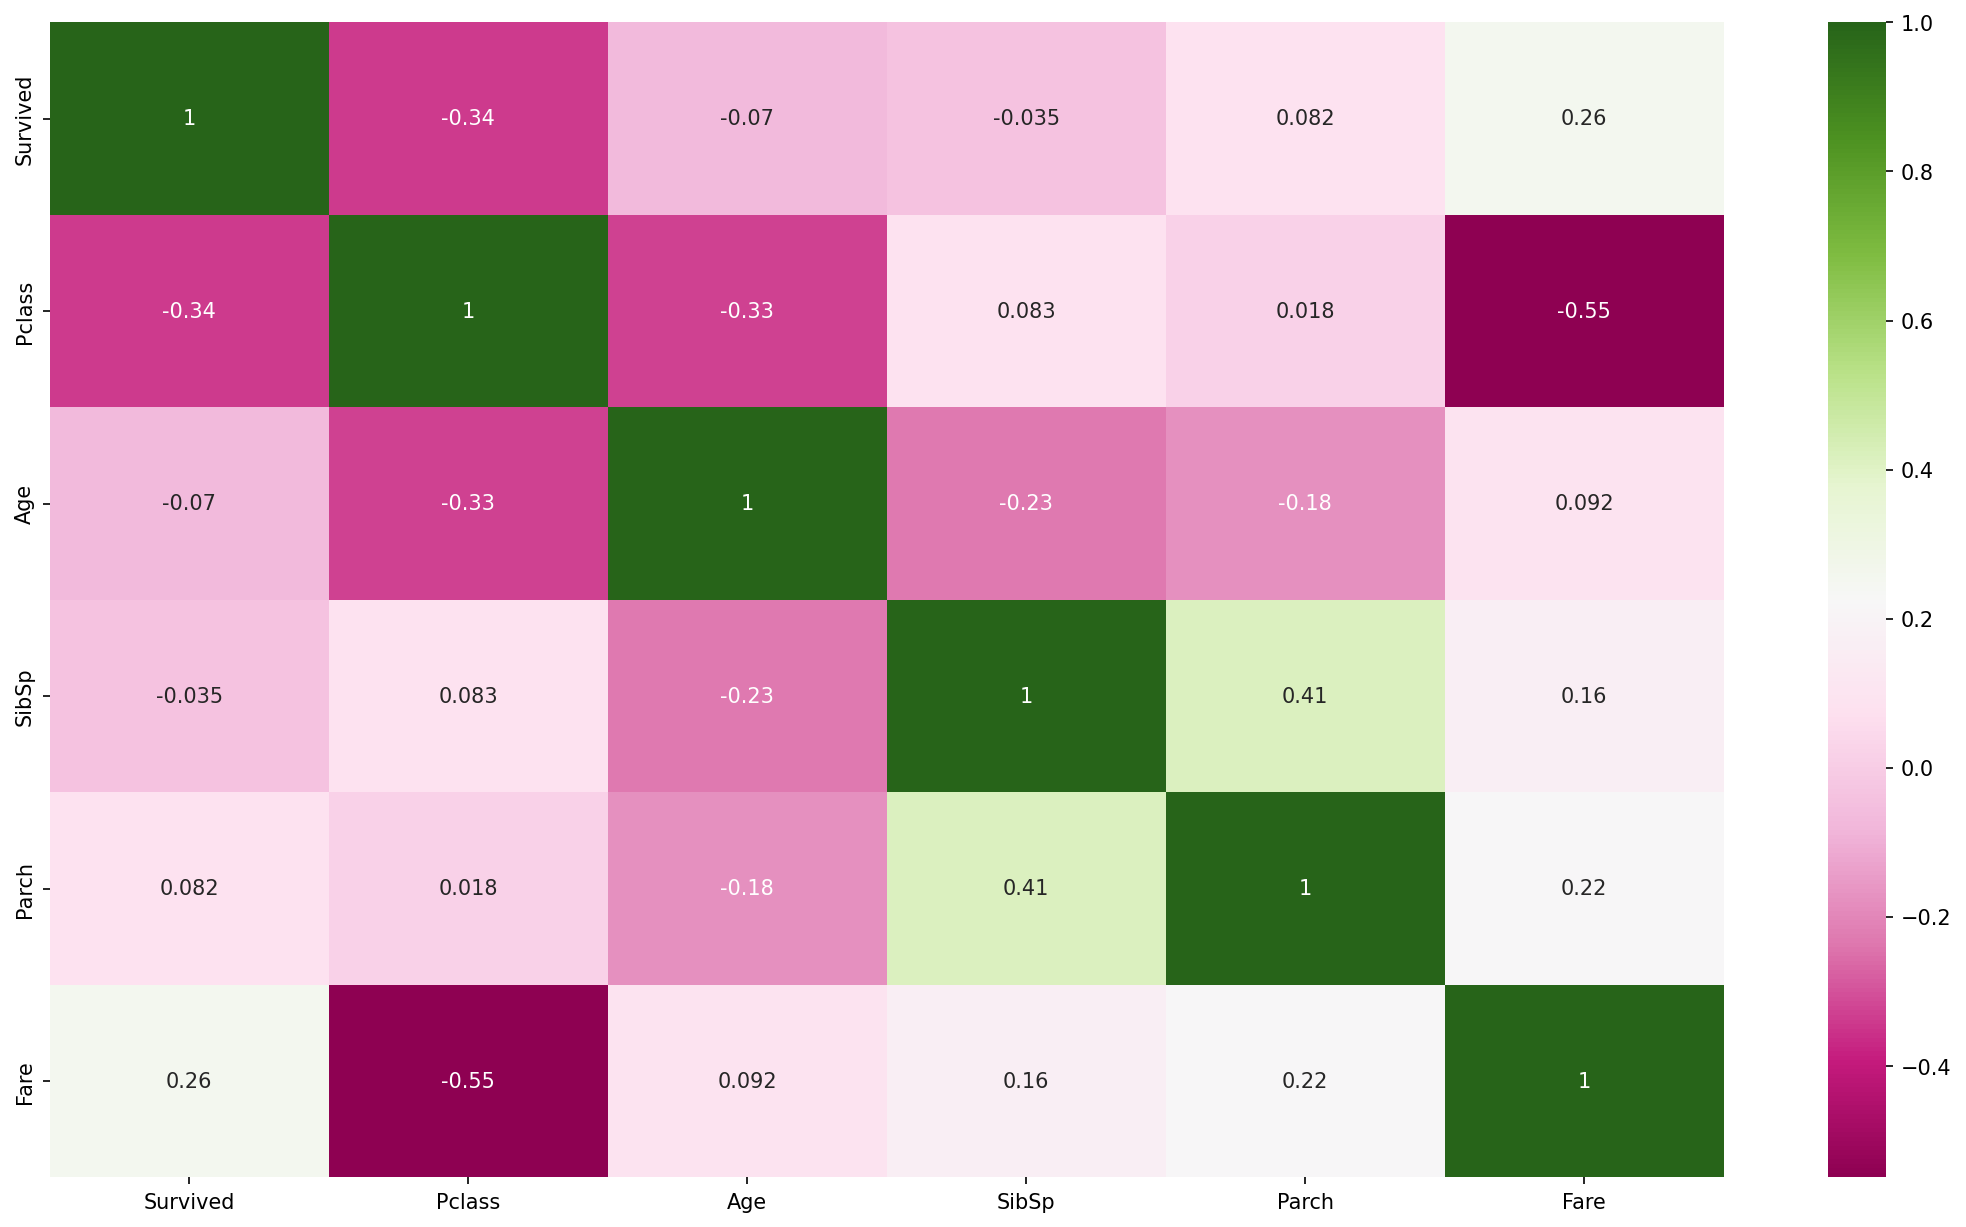

In [28]:
plt.figure(figsize=(18,10),dpi=150)
sns.heatmap(data.corr(),annot=True,cmap='PiYG')

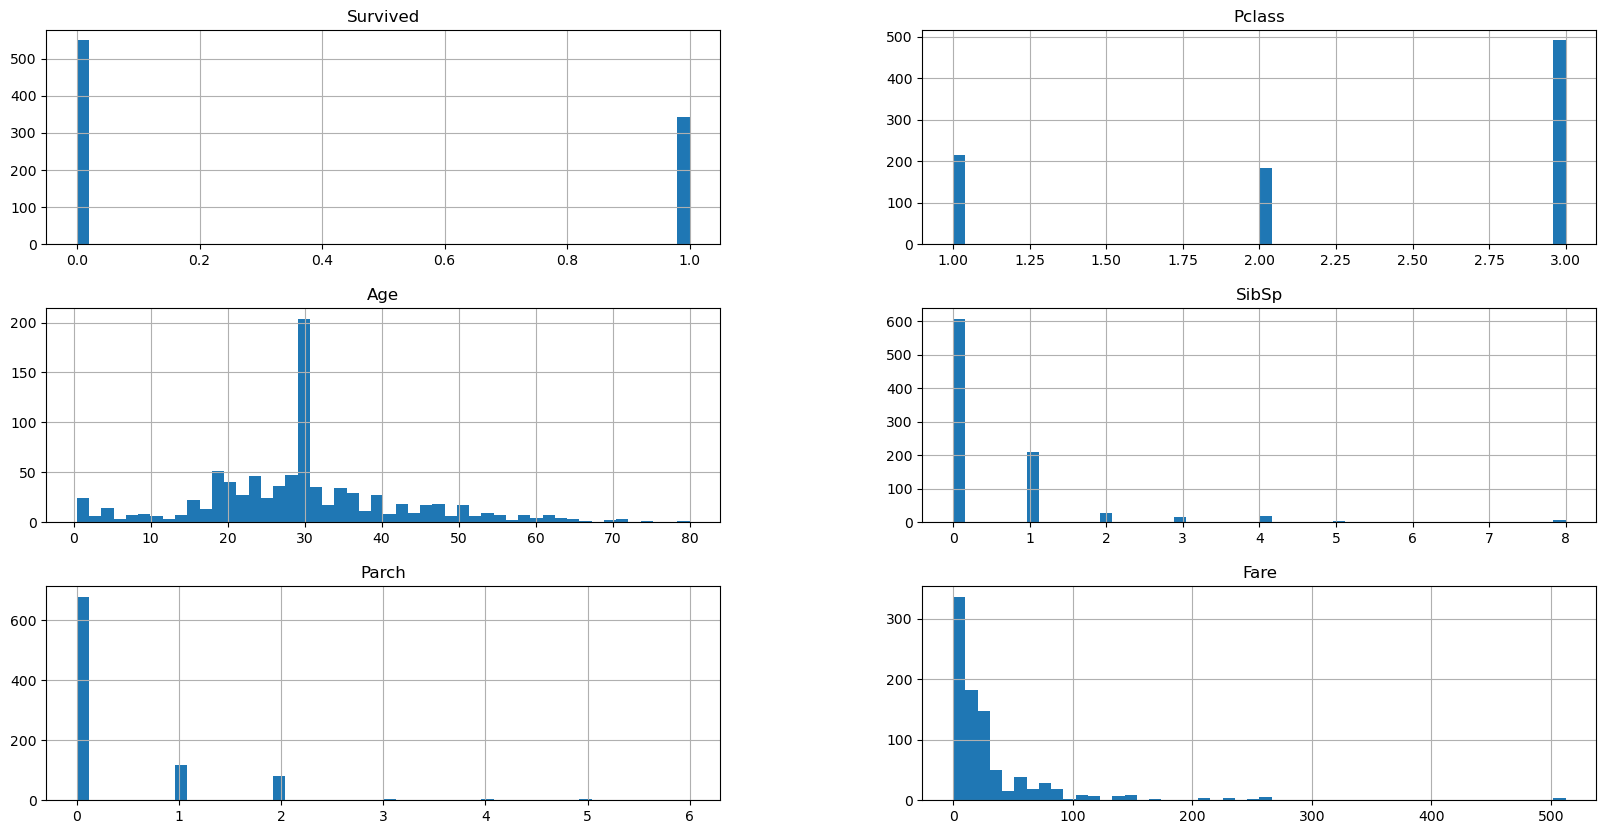

In [29]:
#graphical data overview
data.hist(bins=50, figsize=(20,10))
plt.show()

<AxesSubplot:>

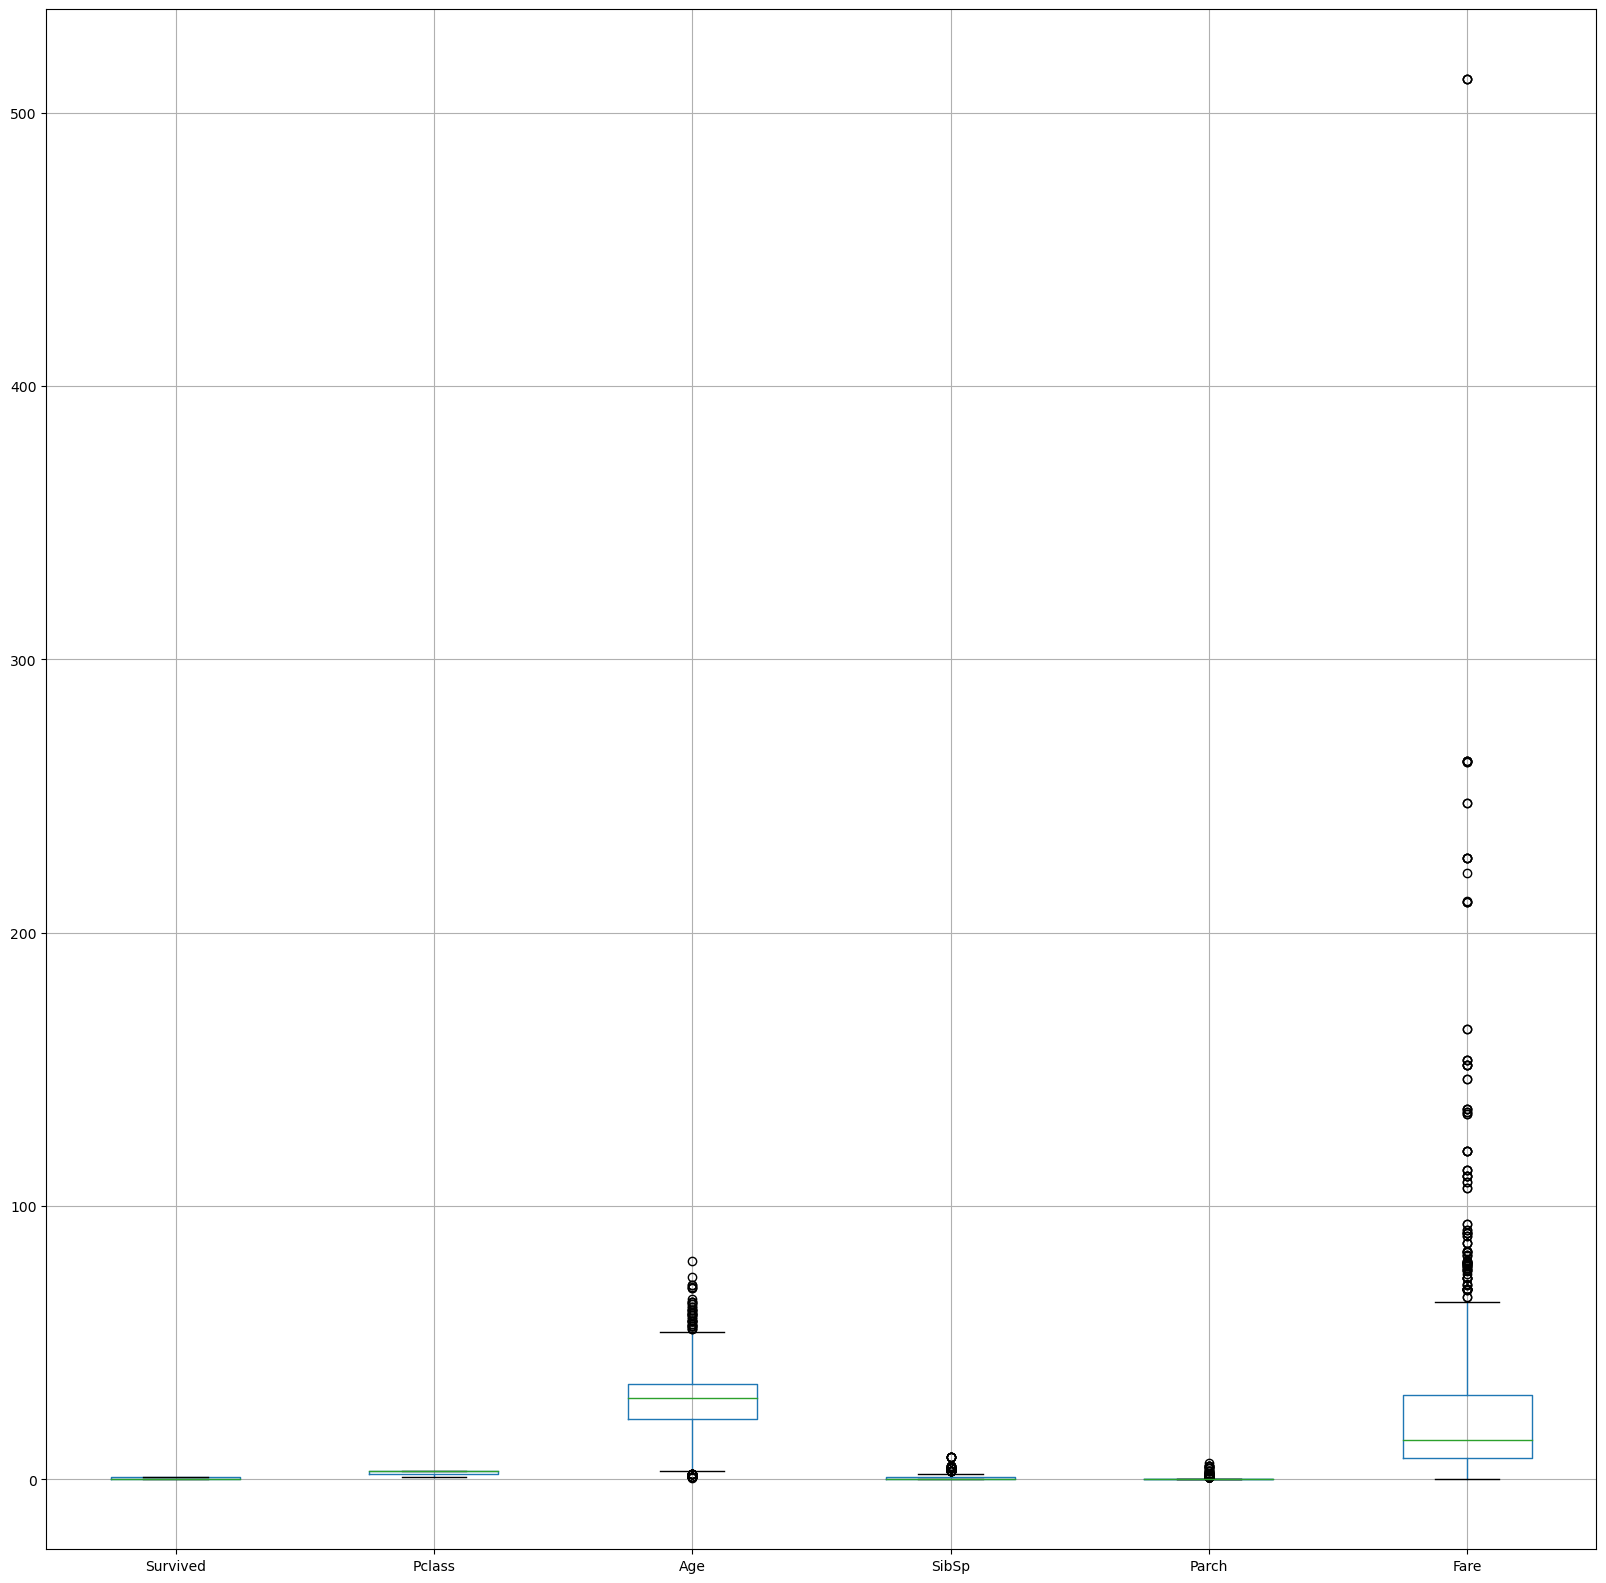

In [30]:
data.boxplot(figsize=(20,20))

anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

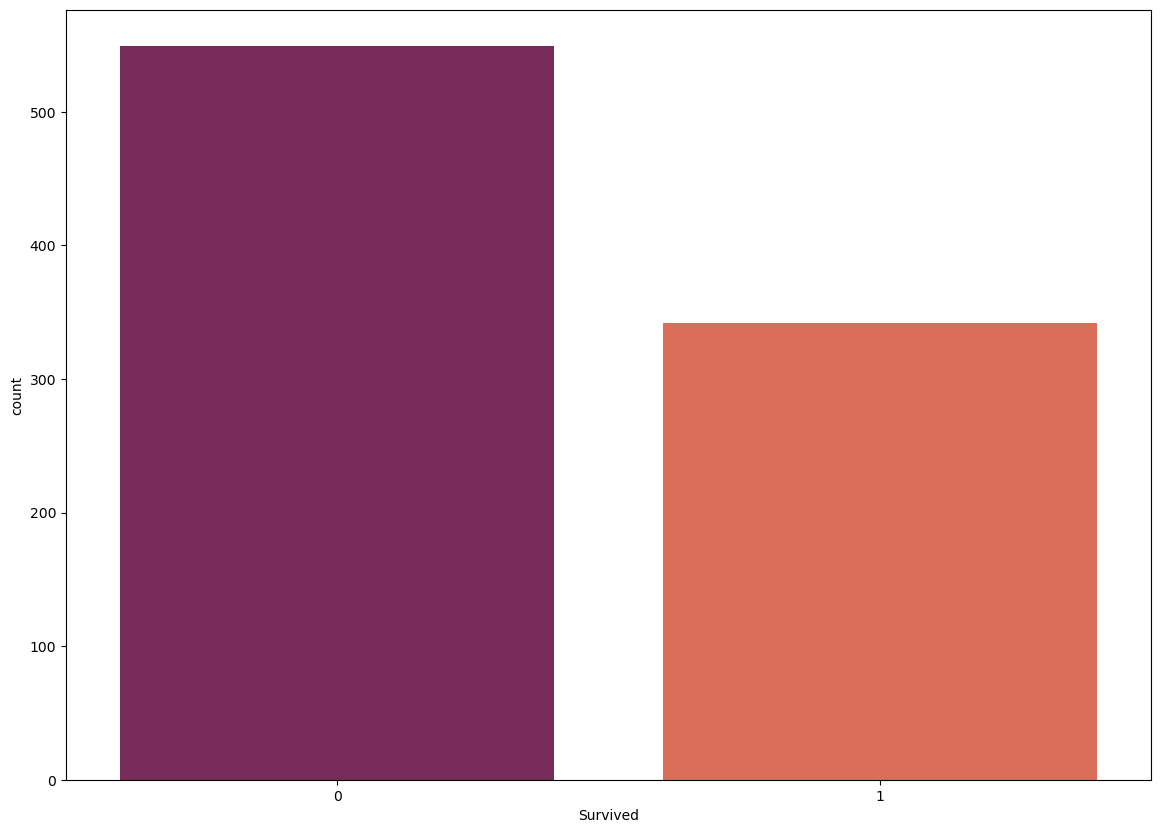

In [31]:
plt.figure(figsize=(14,10))
sns.countplot("Survived", data=data, palette="rocket")

anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='count'>

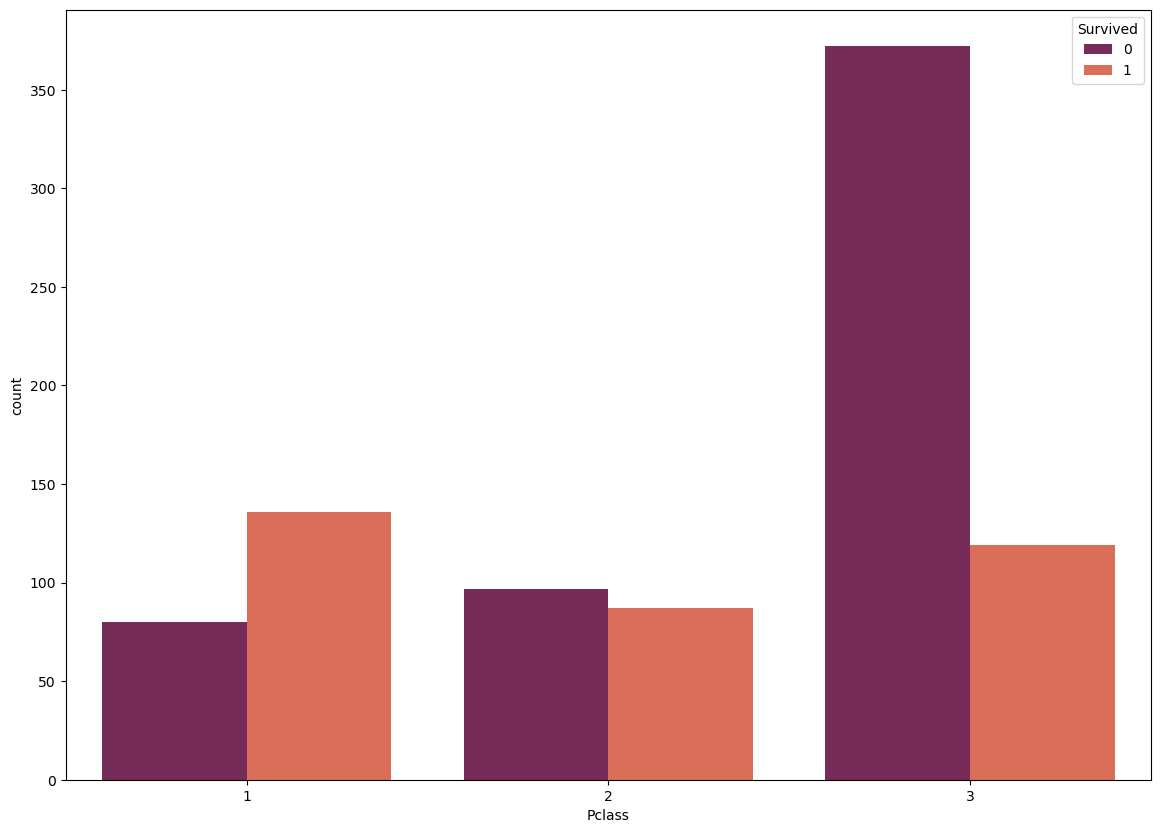

In [32]:
plt.figure(figsize=(14,10))
sns.countplot("Pclass", data=data, palette="rocket", hue="Survived")

anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

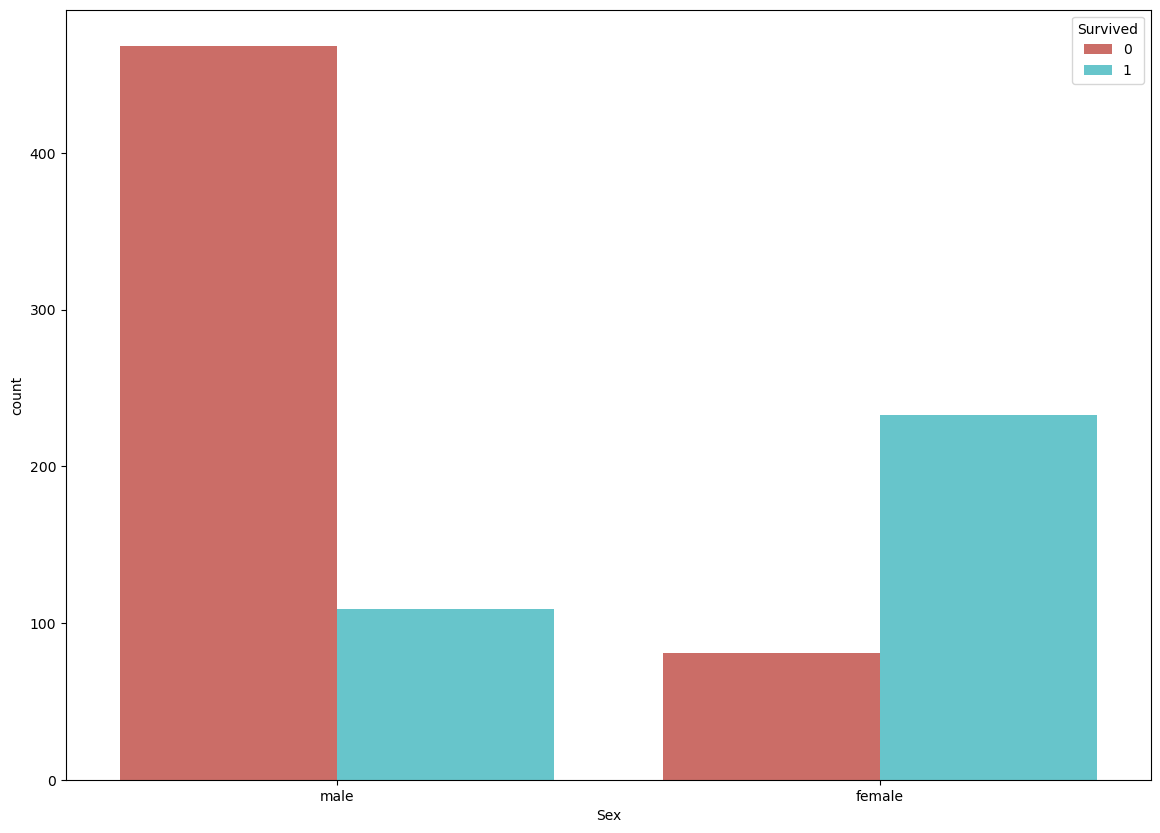

In [33]:
plt.figure(figsize=(14,10))
sns.countplot("Sex", data=data, palette="hls", hue="Survived")

anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SibSp', ylabel='count'>

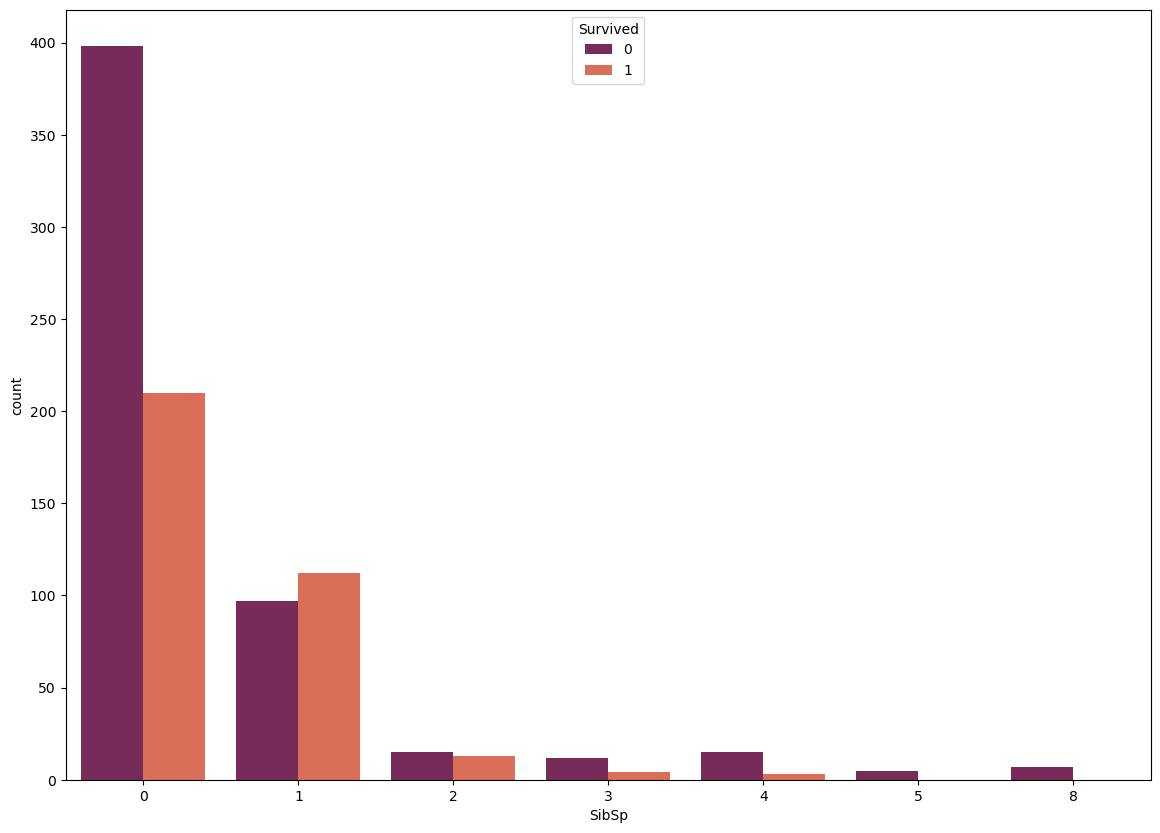

In [34]:
plt.figure(figsize=(14,10))
sns.countplot("SibSp", data=data, palette="rocket", hue="Survived")

anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Parch', ylabel='count'>

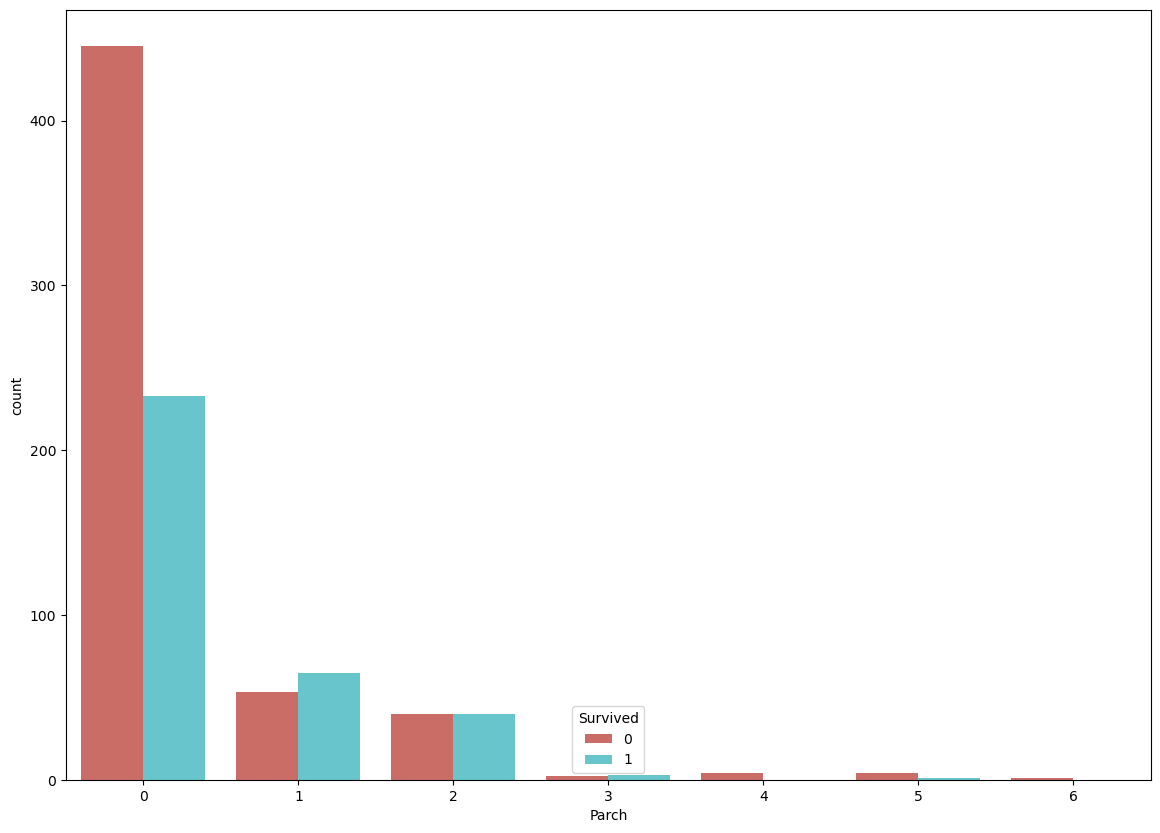

In [35]:
plt.figure(figsize=(14,10))
sns.countplot("Parch", data=data, palette="hls", hue="Survived")

anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Embarked', ylabel='count'>

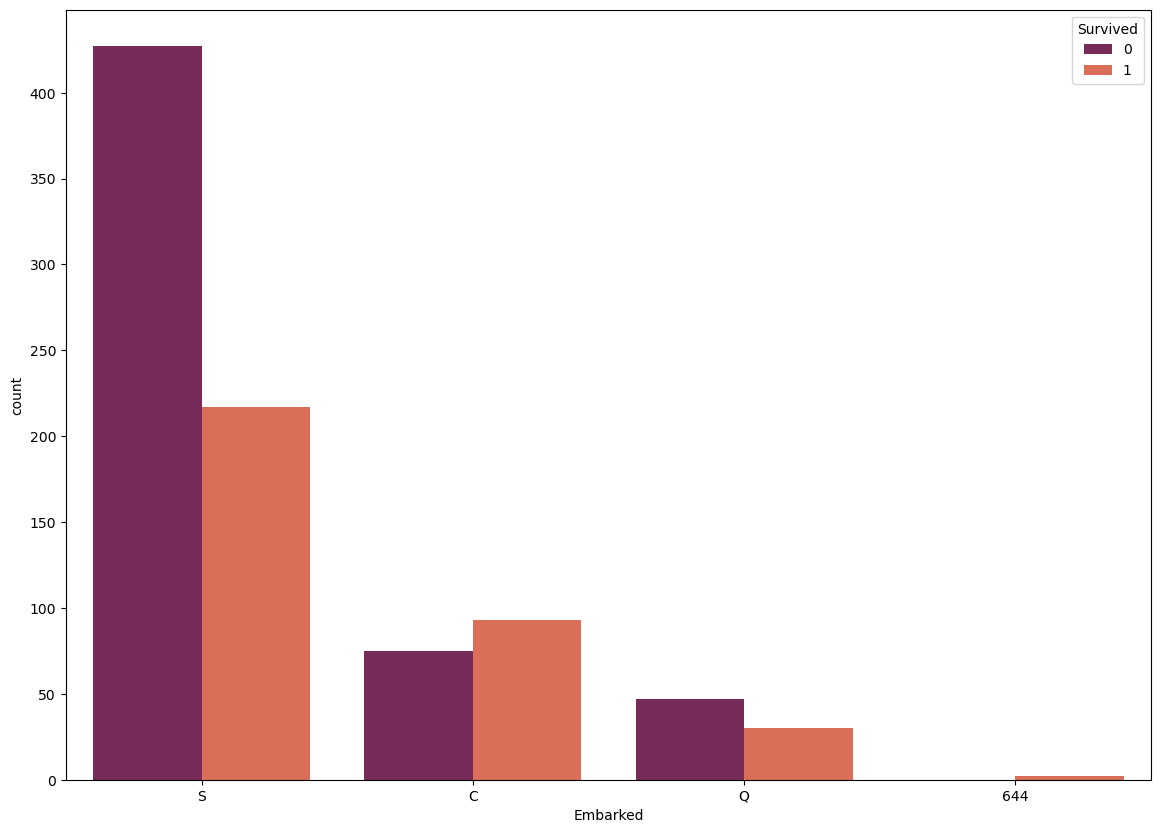

In [36]:
plt.figure(figsize=(14,10))
sns.countplot("Embarked", data=data, palette="rocket", hue="Survived")

In [37]:
#Converting categorical data into Numerical data using get_dummies function

In [38]:
data=pd.get_dummies(data,columns=["Embarked"])

In [39]:
data["Sex"]=data.Sex.map({"male":0,"female":1})

In [40]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_644,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,22.000000,1,0,7.2500,0,0,0,1
1,1,1,1,38.000000,1,0,71.2833,0,1,0,0
2,1,3,1,26.000000,0,0,7.9250,0,0,0,1
3,1,1,1,35.000000,1,0,53.1000,0,0,0,1
4,0,3,0,35.000000,0,0,8.0500,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13.0000,0,0,0,1
887,1,1,1,19.000000,0,0,30.0000,0,0,0,1
888,0,3,1,29.699118,1,2,23.4500,0,0,0,1
889,1,1,0,26.000000,0,0,30.0000,0,1,0,0


In [41]:
data=data.drop(["Embarked_644"],axis=1)

In [42]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,22.000000,1,0,7.2500,0,0,1
1,1,1,1,38.000000,1,0,71.2833,1,0,0
2,1,3,1,26.000000,0,0,7.9250,0,0,1
3,1,1,1,35.000000,1,0,53.1000,0,0,1
4,0,3,0,35.000000,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13.0000,0,0,1
887,1,1,1,19.000000,0,0,30.0000,0,0,1
888,0,3,1,29.699118,1,2,23.4500,0,0,1
889,1,1,0,26.000000,0,0,30.0000,1,0,0


In [43]:
#Model
#Prediction using Logistic Regression

In [44]:
lr = LogisticRegression()

In [45]:
x = data.drop(['Survived'],axis=1)

In [46]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,0,22.000000,1,0,7.2500,0,0,1
1,1,1,38.000000,1,0,71.2833,1,0,0
2,3,1,26.000000,0,0,7.9250,0,0,1
3,1,1,35.000000,1,0,53.1000,0,0,1
4,3,0,35.000000,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...
886,2,0,27.000000,0,0,13.0000,0,0,1
887,1,1,19.000000,0,0,30.0000,0,0,1
888,3,1,29.699118,1,2,23.4500,0,0,1
889,1,0,26.000000,0,0,30.0000,1,0,0


In [47]:
y= data['Survived']

In [48]:
y.shape

(891,)

In [49]:
lr.fit(x,y)

anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [50]:
x_predict = lr.predict(x)

In [51]:
mean_square =mean_squared_error(y,x_predict)

In [52]:
np = np.sqrt(mean_square)
np

0.4444444444444444

In [53]:
#load train data from csv file using pandas
testdata = pd.read_csv("test.csv")

In [54]:
testdata

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [55]:
testdata1 = testdata.drop(['PassengerId','Name','Ticket','Cabin'], axis=1)

In [56]:
testdata1

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500,S
414,1,female,39.0,0,0,108.9000,C
415,3,male,38.5,0,0,7.2500,S
416,3,male,NaN,0,0,8.0500,S


In [57]:
testdata1.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [58]:
testdata1.Age = testdata1.Age.fillna(testdata.Age.mean())

In [59]:
testdata1.Fare = testdata1.Fare.fillna(testdata.Fare.mean())

In [60]:
testdata1.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [61]:
testdata1['Sex'] = testdata1.Sex.map({'male':0,'female':1})

In [62]:
testdata1 = pd.get_dummies(testdata1, columns=["Embarked"])

In [63]:
testdata1

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,0,34.50000,0,0,7.8292,0,1,0
1,3,1,47.00000,1,0,7.0000,0,0,1
2,2,0,62.00000,0,0,9.6875,0,1,0
3,3,0,27.00000,0,0,8.6625,0,0,1
4,3,1,22.00000,1,1,12.2875,0,0,1
...,...,...,...,...,...,...,...,...,...
413,3,0,30.27259,0,0,8.0500,0,0,1
414,1,1,39.00000,0,0,108.9000,1,0,0
415,3,0,38.50000,0,0,7.2500,0,0,1
416,3,0,30.27259,0,0,8.0500,0,0,1


In [64]:
#prediction on test data
y_test_predict = lr.predict(testdata1)

In [65]:
#prediction on train data
y_train_predict = lr.predict(x)

In [66]:
#performance check
accuracy=metrics.accuracy_score(y,y_train_predict)

In [67]:
precision=metrics.precision_score(y,y_train_predict)

In [68]:
recall=metrics.recall_score(y,y_train_predict)

In [69]:
f1_score=metrics.f1_score(y,y_train_predict)

In [70]:
confusion_matrix(y,y_train_predict)

array([[476,  73],
       [103, 239]], dtype=int64)

In [71]:
print("accuracy",accuracy)
print("precision",precision)
print("recall",recall)
print("f1_score",f1_score)

accuracy 0.8024691358024691
precision 0.7660256410256411
recall 0.6988304093567251
f1_score 0.7308868501529052


In [72]:
tree_reg = DecisionTreeClassifier()
tree_reg.fit(x,y)

DecisionTreeClassifier()

In [73]:
y_test_tree = tree_reg.predict(testdata1)
y_train_tree = tree_reg.predict(x)

In [74]:
accuracy1 = metrics.accuracy_score(y,y_train_tree)
precision1 = metrics.precision_score(y,y_train_tree)
recall1 = metrics.recall_score(y,y_train_tree)
f1_score1 = metrics.f1_score(y,y_train_tree)

In [75]:
print("accuracy",accuracy1)
print("precision",precision1)
print("recall",recall1)
print("f1_score",f1_score1)

accuracy 0.9820426487093153
precision 0.9939393939393939
recall 0.9590643274853801
f1_score 0.976190476190476


In [76]:
randomfor = RandomForestClassifier()

In [77]:
randomfor.fit(x,y)

RandomForestClassifier()

In [78]:
y_test_random = randomfor.predict(testdata1)

In [79]:
y_train_random = randomfor.predict(x)

In [80]:
accuracy2 = metrics.accuracy_score(y,y_train_random)
precision2 = metrics.precision_score(y,y_train_random)
recall2 = metrics.recall_score(y,y_train_random)
f1_score2 = metrics.f1_score(y,y_train_random)

In [81]:
print("accuracy",accuracy2)
print("precision",precision2)
print("recall",recall2)
print("f1_score",f1_score2)

accuracy 0.9820426487093153
precision 0.9822485207100592
recall 0.9707602339181286
f1_score 0.9764705882352941


In [82]:
sv = SVC()

In [83]:
sv.fit(x,y)

SVC()

In [84]:
y_test_svc = sv.predict(testdata1)
y_train_svc = sv.predict(x)

In [85]:
accuracy3 = metrics.accuracy_score(y,y_train_svc)
precision3 = metrics.precision_score(y,y_train_svc)
recall3 = metrics.recall_score(y,y_train_svc)
f1_score3 = metrics.f1_score(y,y_train_svc)

In [86]:
print("accuracy",accuracy3)
print("precision",precision3)
print("recall",recall3)
print("f1_score",f1_score3)

accuracy 0.6857463524130191
precision 0.7066666666666667
recall 0.30994152046783624
f1_score 0.43089430894308944


In [87]:
predictions = pd.DataFrame({'PassengerId':testdata['PassengerId'],'Survived': y_test_predict})
predictions.to_csv('submission.csv', index=False)